# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = "{:,.2f}".format

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
type_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
# 2. Get the total drivers for each city type
type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
type_fares_total = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fares_total


type
Rural       4,327.93
Suburban   19,356.33
Urban      39,854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type.
type_fares_avg = pyber_data_df.groupby(["type"]).mean()["fare"]
type_fares_avg

type
Rural      34.62
Suburban   30.97
Urban      24.53
Name: fare, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
type_fares_driver_avg = type_fares_total/type_driver_count
type_fares_driver_avg

type
Rural      55.49
Suburban   39.50
Urban      16.57
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df =pd.DataFrame(
                    {"Total Rides": type_rides_count,
                     "Total Drivers": type_driver_count,
                    "Total Fares": type_fares_total,
                    "Average Fare per Ride" : type_fares_avg,
                    "Average Fare per driver": type_fares_driver_avg,
                    })

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per driver
type,,,,,
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.50
Urban,1625,2405,"39,854.38",24.53,16.57


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per driver
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.50
Urban,1625,2405,"39,854.38",24.53,16.57


In [11]:
#  8. Format the columns.
pyber_summary_df =pd.DataFrame(
                    {"Total Rides": type_rides_count,
                     "Total Drivers": type_driver_count,
                    "Total Fares": type_fares_total.map("${:,.2f}".format),
                    "Average Fare per Ride" : type_fares_avg.map("${:,.2f}".format),
                    "Average Fare per driver": type_fares_driver_avg.map("${:,.2f}".format),
                    })

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [12]:
#  8.1 Format the columns.
pyber_summary_df =pd.DataFrame(
                    {"Total Rides": type_rides_count,
                     "Total Drivers": type_driver_count,
                    "Total Fares": type_fares_total.map("${:,.2f}".format),
                    "Average Fare per Ride" : type_fares_avg.map("${:,.2f}".format),
                    "Average Fare per driver": type_fares_driver_avg.map("${:,.2f}".format),
                     "Total Fare per City type": type_fares_total
                    })

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per driver,Total Fare per City type
Rural,125,78,"$4,327.93",$34.62,$55.49,"4,327.93"
Suburban,625,490,"$19,356.33",$30.97,$39.50,"19,356.33"
Urban,1625,2405,"$39,854.38",$24.53,$16.57,"39,854.38"


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_pyber = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
new_pyber

fare
type  date                     
Rural 2019-01-01 09:45:36 43.69
      2019-01-02 11:18:32 52.12
      2019-01-03 19:51:01 19.90
      2019-01-04 03:31:26 24.88
      2019-01-06 07:38:40 47.33
...                         ...
Urban 2019-05-08 04:20:00 21.99
      2019-05-08 04:39:49 18.45
      2019-05-08 07:29:01 18.55
      2019-05-08 11:38:35 19.77
      2019-05-08 13:10:18 18.04

[2375 rows x 1 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_pyber = new_pyber.reset_index()

In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

new_pyber_pivot = new_pyber.pivot(index="date", columns="type", values="fare")
new_pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
new_pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# new_pyber.loc[['2019-01-01','2019-04-29']]

# new_pyber
new_pyber_df = new_pyber_pivot.loc['2019-01-01':'2019-04-29']
new_pyber_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_pyber_df.index = pd.to_datetime(new_pyber_df.index)

In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
new_pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = new_pyber_df.resample('W').sum()

weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,"1,661.68"
2019-01-13,67.65,"1,105.13","2,050.43"
2019-01-20,306.00,"1,218.20","1,939.02"
2019-01-27,179.69,"1,203.28","2,129.51"
2019-02-03,333.08,"1,042.79","2,086.94"
2019-02-10,115.80,974.34,"2,162.64"
2019-02-17,95.82,"1,045.50","2,235.07"
2019-02-24,419.06,"1,412.74","2,466.29"
2019-03-03,175.14,858.46,"2,218.20"


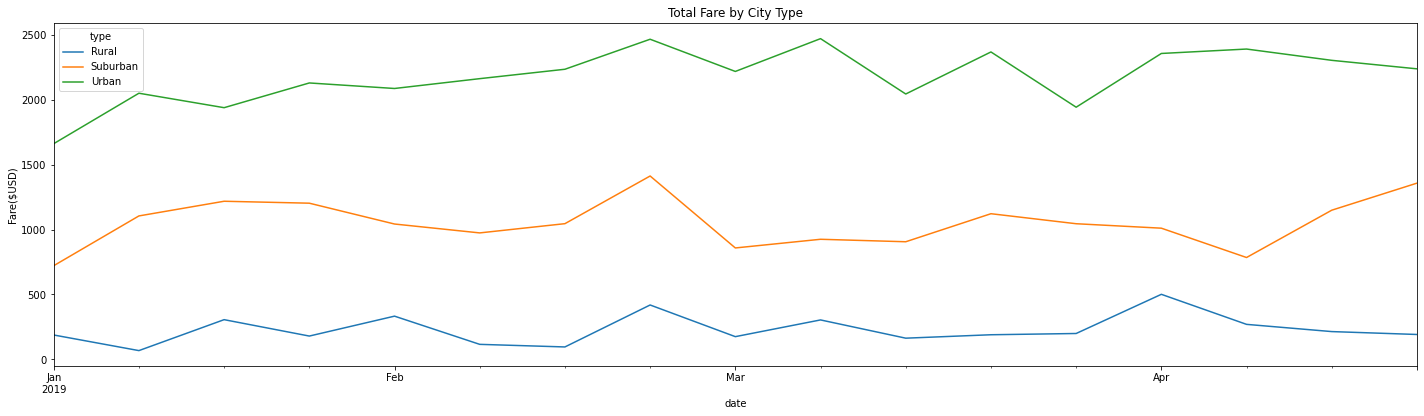

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
# weekly_fares_df.plot()
weekly_fares_df.plot(figsize = (20,6))
plt.xlabel("date")
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")
style.use('fivethirtyeight')
plt.tight_layout()

plt.savefig("Analysis/Total Fare by city type.png")